# Business Problem

Facebook recently introduced a new bidding type, **'averagebidding'**, as an alternative to the existing bidding type called **'maximumbidding'**. One of our clients, decided to test this new feature and would like to run an A/B test to see if averagebidding converts more than maximumbidding. The A/B test has been going on for 1 month and client is now waiting for you to analyze the results of this A/B test. The ultimate success criterion for client is Purchase. Therefore, the focus should be on the Purchase metric for statistical testing.

In this data set, which includes the website information of a company, there is information such as the number of advertisements that users Ad views and click, as well as earnings information from here. There are two separate data sets, the control and test groups. These datasets are in separate sheets of the ab_testing.xlsx excel.

Maximum Bidding was applied to the **control group** and Average Bidding was applied to the **test group**.

## Variables
* Impression: Ad Views
* Click : Number of Clicks On the Displayed Ad
* Purchase: Number of Products Purchased After Ads Clicked
* Earning: Earnings from Purchased Products

# Data Understanding

In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install statsmodels
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, \
    pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest


pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
xls = pd.ExcelFile('../input/ab-test-file/ab_testing.xlsx')
df_control = pd.read_excel(xls, 0)
df_test = pd.read_excel(xls, 1)

In [4]:
def check_df(dataframe, head=10):
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Variables #####################")
    print(dataframe.columns)
    print("##################### Descriptive Stats #####################")
    print(dataframe.describe().T)
    print("##################### Null Values #####################")
    print(dataframe.isnull().sum())
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Info #####################")
    print(dataframe.info())

In [5]:
check_df(df_control)

##################### Head #####################
    Impression      Click  Purchase    Earning
0  82529.45927 6090.07732 665.21125 2311.27714
1  98050.45193 3382.86179 315.08489 1742.80686
2  82696.02355 4167.96575 458.08374 1797.82745
3 109914.40040 4910.88224 487.09077 1696.22918
4 108457.76263 5987.65581 441.03405 1543.72018
5  77773.63390 4462.20659 519.66966 2081.85185
6  95110.58627 3555.58067 512.92875 1815.00661
7 106649.18307 4358.02704 747.02012 1965.10040
8 122709.71659 5091.55896 745.98568 1651.66299
9  79498.24866 6653.84552 470.50137 2456.30424
##################### Variables #####################
Index(['Impression', 'Click', 'Purchase', 'Earning'], dtype='object')
##################### Descriptive Stats #####################
              count         mean         std         min         25%         50%          75%          max
Impression 40.00000 101711.44907 20302.15786 45475.94296 85726.69035 99790.70108 115212.81654 147539.33633
Click      40.00000   5100.65737  

In [6]:
check_df(df_test)

##################### Head #####################
    Impression      Click  Purchase    Earning
0 120103.50380 3216.54796 702.16035 1939.61124
1 134775.94336 3635.08242 834.05429 2929.40582
2 107806.62079 3057.14356 422.93426 2526.24488
3 116445.27553 4650.47391 429.03353 2281.42857
4 145082.51684 5201.38772 749.86044 2781.69752
5 115923.00695 4213.86862 778.37316 2157.40855
6 106116.43664 3279.47297 491.61453 2560.41120
7 125957.11610 4690.56991 855.71980 2563.57976
8 117442.86465 3907.93924 660.47791 2242.23259
9 131271.71560 4721.18781 532.27934 2368.10857
##################### Variables #####################
Index(['Impression', 'Click', 'Purchase', 'Earning'], dtype='object')
##################### Descriptive Stats #####################
              count         mean         std         min          25%          50%          75%          max
Impression 40.00000 120512.41176 18807.44871 79033.83492 112691.97077 119291.30077 132050.57893 158605.92048
Click      40.00000   3967.549

In [7]:
num_cols = [col for col in df_control.columns if df_control[col].dtypes in [int, float]]
for col in num_cols:
    print(col, "Confidence_Interval_Control", sms.DescrStatsW(df_control[col]).tconfint_mean())
    print(col, "Confidence_Interval_Test", sms.DescrStatsW(df_test[col]).tconfint_mean())

Impression Confidence_Interval_Control (95218.50401213673, 108204.39412325788)
Impression Confidence_Interval_Test (114497.4978773465, 126527.32563772256)
Click Confidence_Interval_Control (4675.307376598384, 5526.007368556174)
Click Confidence_Interval_Test (3672.3296353187875, 4262.769886293253)
Purchase Confidence_Interval_Control (508.0041754264924, 593.7839421139709)
Purchase Confidence_Interval_Test (530.5670226990062, 633.6451705979289)
Earning Confidence_Interval_Control (1811.6904932901255, 2005.4461063153728)
Earning Confidence_Interval_Test (2424.469019772786, 2605.3124455284496)


<AxesSubplot:xlabel='Impression', ylabel='Purchase'>

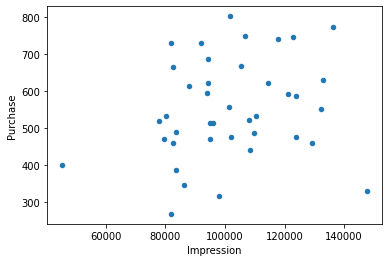

In [8]:
df_control.plot.scatter("Impression", "Purchase")

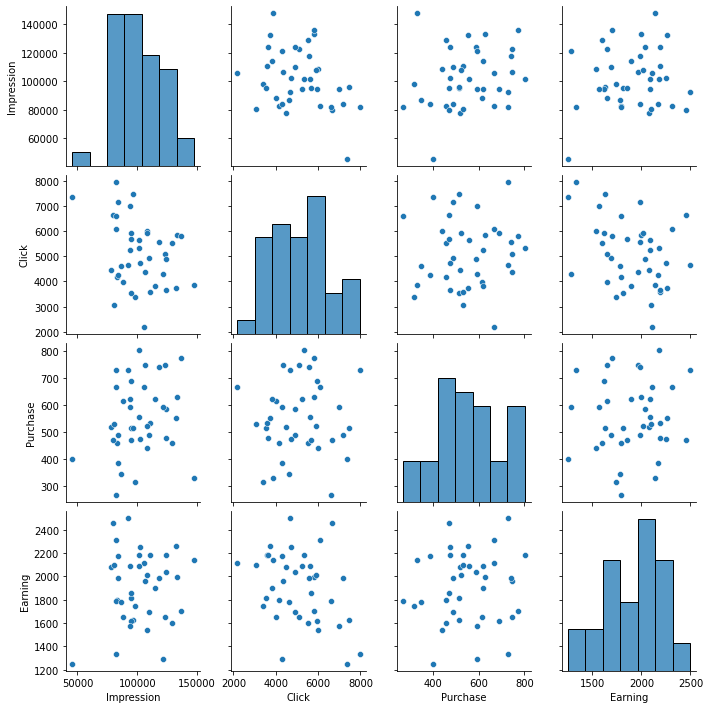

In [9]:
sns.pairplot(df_control)

In [ ]:
sns.pairplot(df_test)

<AxesSubplot:>

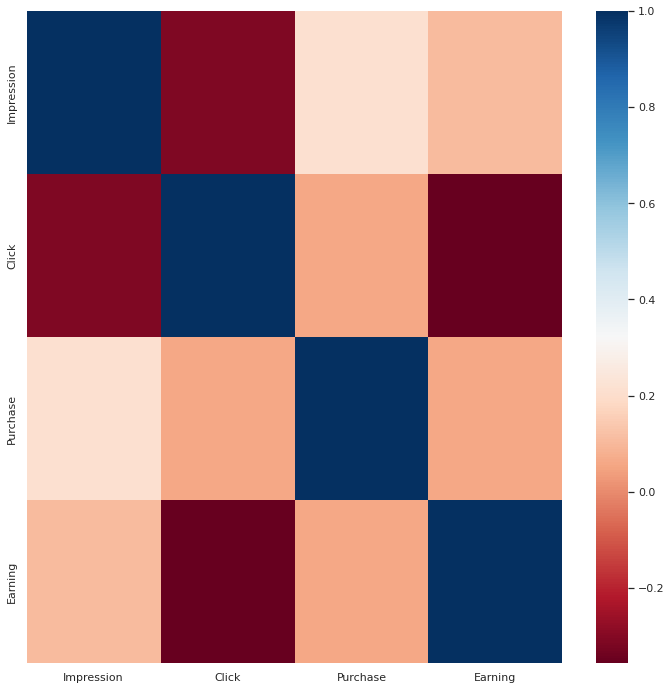

In [10]:
corr = df_control[num_cols].corr()
sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr, cmap="RdBu")

In [ ]:
corr = df_test[num_cols].corr()
sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr, cmap="RdBu")

There does not appear to be a **strong correlation** within either group. There is a low negative correlation between Click and Impression. There appears to be a low positive correlation between Earning and Click.

# Data Preparation

We combined data of two groups

In [11]:
df_control["Group"] = "C"
df_test["Group"] = "T"
df_control_test = pd.concat([df_control,df_test], ignore_index=True)

# Hypothesis Testing

Define hypothesis

* H0: M1 = M2 (There is no statistically significant differences between purchase averages of maximum bidding and average bidding bid type)
* H1: M1 != M2 (there is difference)

In [12]:
df_control_test.groupby("Group").agg({"Impression": "mean", "Click": "mean", "Purchase": "mean", "Earning": "mean"})

,Impression,Click,Purchase,Earning
Group,,,,
C,101711.44907,5100.65737,550.89406,1908.56830
T,120512.41176,3967.54976,582.10610,2514.89073


In [14]:
print("Confidence interval for weighted mean of data - Control Group" ,sms.DescrStatsW(df_control_test.loc[df_control_test["Group"] == "C", "Purchase"]).tconfint_mean())
print("Confidence interval for weighted mean of data - Test Group" ,sms.DescrStatsW(df_control_test.loc[df_control_test["Group"] == "T", "Purchase"]).tconfint_mean())

Confidence interval for weighted mean of data - Control Group (508.0041754264924, 593.7839421139709)
Confidence interval for weighted mean of data - Test Group (530.5670226990062, 633.6451705979289)


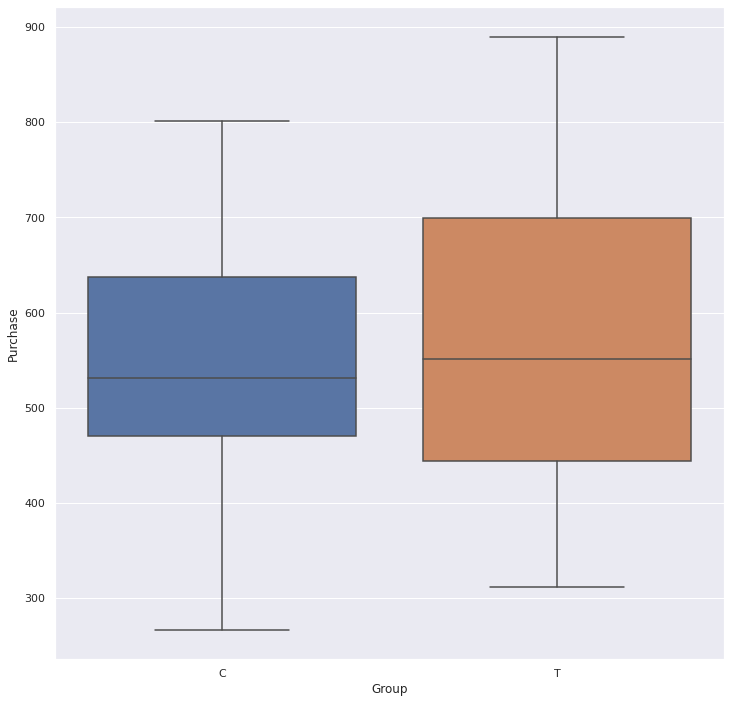

In [15]:
sns.boxplot(x = "Group", y = "Purchase", data = df_control_test);

There is no difference between the averages at first glance.

**Performing Hypothesis Testing**

* Step 1: Perform hypothesis checks before hypothesis testing.
* These are Assumption of Normality and Homogeneity of Variance. Whether the control and test groups fit the normality assumption.
* The test will be done on the Purchase variable, which is included in the two groups.
* Normality Assumption :
* H0: Normal distribution assumption is provided.
* H1: The assumption of normal distribution is not provided.
* p < 0.05 H0 REJECT , p > 0.05 H0 CANNOT REJECT

In [17]:
test_stat, pvalue = shapiro(df_control_test.loc[df_control_test["Group"] == "C", "Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

test_stat, pvalue = shapiro(df_control_test.loc[df_control_test["Group"] == "T", "Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9773, p-value = 0.5891
Test Stat = 0.9589, p-value = 0.1541


According to the results of the p-value values of the Test (p = 0.1541) and Control (p = 0.5891) groups, the assumption of normality is provided.

* Variance Homogeneity
* H0: Variances are homogeneous.
* H1: Variances are not homogeneous.
* p < 0.05 H0 REJECT , p > 0.05 H0 CANNOT REJECT

In [19]:
test_stat, pvalue = levene(df_control_test.loc[df_control_test["Group"] == "C", "Purchase"],
                           df_control_test.loc[df_control_test["Group"] == "T", "Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 2.6393, p-value = 0.1083


According to the results of the homogeneity of variance test of the Test and Control groups, p = 0.1083. Accordingly, the variance homogeneity condition is also met.

Since the conditions are met, parametric independent two-sample t-test can be used to compare group means.

* H0: M1 = M2 (There is no statistically significant differences between purchase averages of maximum bidding and average bidding bid type)
* H1: M1 != M2 (there is difference)

In [20]:
test_stat, pvalue = ttest_ind(df_control_test.loc[df_control_test["Group"] == "C", "Purchase"],
                              df_control_test.loc[df_control_test["Group"] == "T", "Purchase"],
                              equal_var=True)

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = -0.9416, p-value = 0.3493


P-value = 0.3493. According to this result, there is no statistically significant difference between the purchase averages according to the two bidding methods.

## Final Thoughts

In the related business problem, the effects of 2 different bid types (Maximum bidding, Average Bidding) on sales averages were examined. Purchase mean of control and test groups was compared using independent two-sample t-test. Parametric test was used since the conditions of normality and homogeneity of variance were met.

According to the results we obtained, there is no statistical difference between the sales average of the two offer types (95% confidence). Accordingly, in order to obtain more reliable results, more test data can be obtained, t-test can be applied again and the results can be compared. A second option would be to develop an alternative bidding type or improving existing method. Or a different type of bidding can be developed. Studies should be carried out to select the most efficient method and to increase ad conversion rates. Developed methods will give clearer results when compared with more data in the medium and long term.